In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')

from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from io_functions import *
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *

Couldn't import dot_parser, loading of dot files will not be possible.


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from operator import itemgetter

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [4]:
from detect_intermediates import *
from interpret_tICs import *

we are operating on biox3


In [5]:
from mor_h8_feature_types import *
from get_variable_names import *
from mor_h8_tica_config import *
from residue import Residue, Atom
ori_feature_name = copy.deepcopy(feature_name)

tm6_tm3_residues
[R279, R165]
[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 273, 274, 275, 276, 277, 278,

In [20]:
rho = 0.1
rho_string = "0pt1"
lag_time = 5
n_components = 10
n_clusters = 1000

rho = 0.05
rho_string = "0pt05"
lag_time=50

In [23]:
schemes = ["closest-heavy", "CA"]
feature_name = "%s-CA" %ori_feature_name
#feature_name = "%s_phi_psi_chi2" %feature_name
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
#tica_dir = "%s-with-inactive" %tica_dir
tica_dir = "%s-backup" %tica_dir


ori_tica_dir = copy.deepcopy(tica_dir)
#tica_dir = "%s-normalized" % ori_tica_dir
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA
/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA


In [25]:
from ipyparallel import Client
rc = Client()
print(len(rc.ids))
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

273


<AsyncMapResult: chdir>

In [26]:
tica_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup'

In [27]:
feature_name_residues_dict.keys()

['tm6_tm5_packing',
 'tm6_tm7_packing',
 'rmsd_DRY_inactive',
 'tm6_tm3_dist',
 'rmsd_triad_active',
 'rmsd_triad_inactive',
 'rmsd_npxxy_inactive',
 'rmsd_npxxy_active',
 'rmsd_DRY_active',
 'res_277_res_339_ca_dist',
 'tm6_tm3_packing']

In [ ]:
contact_residues

In [ ]:
import custom_featurizer
reload (custom_featurizer)
from custom_featurizer import *
suf_trajectories = [t for t in get_trajectory_files(traj_dir, ".h5") if "suf" in t and "re" in t]
fix_chain_names(suf_trajectories, dview)
#featurize_contacts_custom(traj_dir, features_dir = features_dir, traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, structures=[inactive_dir, active_dir], contact_residues=contact_residues,
#                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
#                          user_specified_atom_residue_pairs = [], load_from_file=False, worker_pool=None, schemes=schemes)

In [ ]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
user_defined_features_dir = "%s/user_defined_features" %traj_dir
if not os.path.exists(user_defined_features_dir):
    os.makedirs(user_defined_features_dir)
compute_user_defined_features_wrapper(traj_dir, traj_ext, inactive_dir, active_dir, None,
                                        feature_name_residues_dict, user_defined_features_file, worker_pool=dview, 
                                        save_dir=user_defined_features_dir, parallel=False)

In [ ]:
type(contact_residues[0])

In [8]:
traj_dir = "/home/enf/md_simulations/MOR/h8_reimaged/trajectories"

In [ ]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
featurize_contacts_custom(traj_dir, features_dir = features_dir, traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, structures=[inactive_dir, active_dir], contact_residues=contact_residues,
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs = [], load_from_file=False, worker_pool=dview, schemes=schemes)

In [ ]:
fit_normalizer(features_dir)

In [9]:
import pickle
with open(feature_residues_pkl, "rb") as f:
    feature_residues = pickle.load(f)

In [10]:
feature_residues

[ILE193 to ILE198,
 LEU194 to ILE198,
 ALA197 to ILE198,
 ILE198 to VAL236,
 ILE198 to GLY199,
 ILE198 to PHE152,
 ILE198 to PRO201,
 ILE198 to LEU232,
 ILE198 to SER145,
 ILE198 to TYR148,
 ILE198 to TYR149,
 ILE198 to MET151,
 ILE198 to VAL202,
 ILE198 to CYS235,
 ILE198 to MET203,
 ILE198 to PHE239,
 SER196 to ILE198,
 SER195 to ILE198,
 ILE198 to LEU200,
 THR67 to ILE69,
 ILE69 to THR70,
 ILE69 to LEU74,
 ILE69 to MET65,
 ILE69 to MET72,
 VAL66 to ILE69,
 ALA68 to ILE69,
 ILE69 to ALA73,
 ILE69 to LEU129,
 ILE69 to ILE71,
 ARG211 to ILE215,
 TYR210 to ARG211,
 ARG211 to ASP216,
 ARG211 to GLN212,
 LYS209 to ARG211,
 ARG211 to GLY213,
 ARG211 to SER214,
 THR132 to ASN127,
 PRO134 to ASN127,
 ILE215 to ASN127,
 SER125 to ASN127,
 MET130 to ASN127,
 GLN124 to ASN127,
 PHE123 to ASN127,
 PRO122 to ASN127,
 ASP216 to ASN127,
 PHE135 to ASN127,
 CYS217 to ASN127,
 VAL126 to ASN127,
 TYR128 to ASN127,
 GLY131 to ASN127,
 LEU129 to ASN127,
 TRP133 to ASN127,
 ILE193 to LEU194,
 ILE193 to A

In [ ]:
import custom_tica
reload(custom_tica)
from custom_tica import *
fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True, partial_fit=True)

loading "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/normalizer.h5"...
loading feature files
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_1.dataset
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_10.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_10.dataset
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_100.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_100.dataset
fitting tICA model to /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_r

In [46]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *

featurize_contacts_custom(ref_receptors_dir, features_dir = ref_features_dir, traj_ext = ".pdb", contact_residue_pairs_file = feature_residues_pkl, structures=[inactive_dir, active_dir], contact_residues=contact_residues,
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs = [], load_from_file=False, worker_pool=dview, schemes=schemes)

already featurized
already featurized
structure
/home/enf/md_simulations/MOR/4dkl_R_for_conformation.pdb
structure
None
mdraj_index_combinations[0:10]
[(133, 4), (133, 146), (133, 62), (133, 128), (133, 261), (133, 274), (133, 67), (133, 29), (133, 27), (133, 69)]
contact_features[0:10]
[[ILE198, ILE69], [ILE198, ARG211], [ILE198, ASN127], [ILE198, ILE193], [ILE198, ASN332], [ILE198, ARG345], [ILE198, THR132], [ILE198, VAL94], [ILE198, VAL92], [ILE198, PRO134]]
About to compute 36315 features
(1, 36315)
cutoff
0.66
distances[0:10]
[[ 2.9838984   2.29805589  1.95851779 ...,  3.44139647  2.53797245
   3.89411235]]
There are 1963 residue-residue contacts below cutoff in structure.
structure
/home/enf/md_simulations/MOR/5c1m.pdb
structure
None
mdraj_index_combinations[0:10]
[(146, 17), (146, 159), (146, 75), (146, 141), (146, 280), (146, 293), (146, 80), (146, 42), (146, 40), (146, 82)]
contact_features[0:10]
[[ILE198, ILE69], [ILE198, ARG211], [ILE198, ASN127], [ILE198, ILE193], [ILE198, 

In [11]:
ref_features = [load_file(f) for f in get_trajectory_files(ref_features_dir, ".dataset")]
print(len(ref_features))
print(ref_features[0].shape)
print(ref_features[1].shape)
print(len(feature_names))
ref_features = pd.DataFrame(ref_features[0], columns=[str(f) for f in feature_names])

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors/4dkl_R_for_conformation.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors/5c1m.dataset
2
(1, 4440)
(1, 4440)


NameError: name 'feature_names' is not defined

In [88]:
transform(existing_model = projection_operator_dir, features_directory = ref_features_dir, tica_dir = ref_tica_dir, normalizer=verboseload("%s/normalizer.h5" %features_dir))


loading "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/normalizer.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_tica_coords.h5"...
None
None
['/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors/4dkl_R_for_conformation.dataset', '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors/5c1m.dataset']
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors/4dkl_R_for_conformation.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors/5c1m.dataset


In [28]:
import custom_tica
reload(custom_tica)
from custom_tica import *
transform_to_h5(projection_operator_dir, features_dir, projected_features_dir, worker_pool=None, parallel=True, normalizer=verboseload("%s/normalizer.h5" %features_dir))

loading "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/normalizer.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_tica_coords.h5"...
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_projected.h5"... (<type 'list'>)
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_233.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_137.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-

In [29]:
tica_object = verboseload(projection_operator_dir)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_tica_coords.h5"...

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_177.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_80.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_214.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_178.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_81.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_215.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residue

In [30]:
#all_tica = verboseload(projected_features_dir)
#all_tica = [x[:,range(1,10)] for x in all_tica]
#print(all_tica[0].shape)
#print(len(all_tica))
#verbosedump(all_tica, projected_features_dir)


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_99.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_60.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_196.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_1.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_61.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_197.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_10.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_62.dataset


loading /hom

In [31]:
#n_components=9




loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_41.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_176.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_139.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_42.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_177.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_14.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_43.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_178.datasetloading /home/enf/md_sim

In [32]:
tica_object.timescales_


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_252.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_72.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_162.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_253.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_73.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_163.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_254.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_74.datasetloading /home/enf/md_simu

array([ 1054.91925408,   890.42810767,   537.02140016,   472.05548618,
         450.79495335,   389.75700775,   318.90666288,   260.3743647 ,
         254.60134778,   239.3203243 ])




loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_60.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_270.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_200.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_61.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_271.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_201.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_62.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_272.

In [ ]:
plot_columns(tica_dir, projected_features_dir, titles = ["tIC%d" %j for j in range(1,11)], tICA = True, scale = 1.0, refcoords_file = None)

In [33]:
feature_indices = []
traj_basenames = get_trajectory_files(traj_dir, ".h5")
traj_basenames = [os.path.splitext(os.path.basename(t))[0] for t in traj_basenames]
feature_basenames = get_trajectory_files(features_dir, ".dataset")
feature_basenames = [os.path.splitext(os.path.basename(t))[0] for t in feature_basenames]
for i, traj_basename in enumerate(traj_basenames):
    if traj_basename in feature_basenames:
        feature_indices.append(int(i))


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_225.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_504.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_356.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_226.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_505.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_357.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_227.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA

In [34]:
tica_coords = verboseload(projected_features_dir)
pnas_coords = verboseload(user_defined_features_file)
pnas_coords = [pnas_coords[i] for i in feature_indices]
tica_names = ["tIC.%d" %i for i in range(1,n_components+1)]
pnas_names = sorted(feature_name_residues_dict.keys())

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_projected.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5"...loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_168.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_441.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_72.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_169.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_442.dataset


loading /home/enf/md_simulations/MOR/h8_reimaged/featu

In [35]:
print(np.concatenate(tica_coords).shape)
print(np.concatenate(pnas_coords).shape)

(755979, 10)
(755979, 11)


In [27]:
from plots import *

In [ ]:
plot_data_vs_data(np.concatenate(tica_coords), np.concatenate(pnas_coords), tica_names, pnas_names, analysis_dir)

In [36]:
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)

In [37]:
with open(feature_residues_pkl) as f:
    feature_names = pickle.load(f)
print(feature_names[0].__repr__())

ILE193 to ILE198


In [38]:
from residue import *
print(type(feature_names[0]))
print(type(feature_names[0] == DihedralFeature))


<class 'residue.ContactFeature'>
<type 'bool'>


In [39]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_components_dir = tica_dir
important_contact_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, feature_residues_pkl, n_tica_components=n_components, percentile=95)


Interpreting tIC 1
feature_importances_df.shape
(5, 7)
residue_importances_df.shape
(6, 3)
           feature_name     res_i     res_j  resid_i  resid_j  importance  \
2  Val66_Ca To Ile69_Ca  Val66_Ca  Ile69_Ca       66       69    0.716698   
4  Val66_Ca To Ile71_Ca  Val66_Ca  Ile71_Ca       66       71   -0.487056   
3  Thr67_Ca To Ile71_Ca  Thr67_Ca  Ile71_Ca       67       71    0.332113   
0        Val66 To Thr70     Val66     Thr70       66       70    0.258456   
1  Thr67_Ca To Ile69_Ca  Thr67_Ca  Ile69_Ca       67       69   -0.229829   

                feature  
2  VAL66_CA to ILE69_CA  
4  VAL66_CA to ILE71_CA  
3  THR67_CA to ILE71_CA  
0        VAL66 to THR70  
1  THR67_CA to ILE69_CA  
Using dark_background
           residue  importance  resid
Ile69_Ca  Ile69_Ca    0.669372     69
Val66_Ca  Val66_Ca    0.656510     66
Thr67_Ca  Thr67_Ca    0.304016     67
Ile71_Ca  Ile71_Ca    0.291155     71
Thr70        Thr70    0.258456     70
Val66        Val66    0.258456     66
Us

In [ ]:
tic_components_dir = tica_dir
important_contact_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, feature_residues_pkl, n_tica_components=n_components, percentile=95)



In [ ]:
important_contact_features[0]

In [40]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_subsampled_features_file = "%s/features_subsampled.pkl" % tica_dir
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
important_contact_features_pruned, important_contact_features_indices = find_non_zero_features(important_contact_features[0], feature_names)
subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file)

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_1.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_133.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_168.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_201.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_236.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_74.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_4.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_108.dataset
loading /home/enf/md_simulations/MOR/h8_reimaged/fea

In [33]:
if os.path.exists(tic_subsampled_features_file):
    print("hi")

hi


In [34]:
protein_top_features = load_file(tic_subsampled_features_file)



loading /home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt2/features_subsampled.pkl


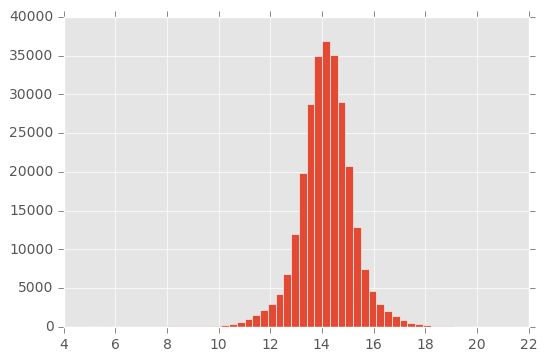

In [68]:
plt.hist(pd.concat([protein_top_features[i] for i in suf_trajs], axis=0)["MET281_CA to MET161_CA"].values*10., bins=50, range=[5,20])
plt.show()

In [69]:
from ipyparallel import Client
rc = Client()
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

print(len(rc.ids))


273


In [41]:
bu72_trajs = []
apo_trajs = []
oxy_trajs = []
suf_trajs = []
trv_trajs = []
inactive_trajs = []
trajs = get_trajectory_files(features_dir, ".dataset")
#trajs = [t for t in get_trajectory_files(traj_dir, traj_ext) if "apo_reimaged" not in t and "oxy" not in t]
for i, traj in enumerate(trajs):
    if "bu72" in traj:
        bu72_trajs.append(i)
    elif "apo" in traj:
        apo_trajs.append(i)
    elif "oxy" in traj:
        oxy_trajs.append(i)
    elif "suf" in traj:
        suf_trajs.append(i)
    elif "trv" in traj:
        trv_trajs.append(i)
    elif "Co" in traj or "CO" in traj:
        inactive_trajs.append(i)

user_defined_coords = load_file(user_defined_features_file)

            

loading /home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5"...




loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_119.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_153.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_188.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_221.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_256.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_94.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_rep_

In [42]:
bu72_pnas = [user_defined_coords[i] for i in bu72_trajs]
apo_pnas = [user_defined_coords[i] for i in apo_trajs]
oxy_pnas = [user_defined_coords[i] for i in oxy_trajs]
suf_pnas = [user_defined_coords[i] for i in suf_trajs]

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_28.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_130.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_156.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_2.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_165.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_53.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_62.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/apo_reseeded_rep_88.dataset











loading

In [43]:
bu72_pnas_file = "%s/bu72.h5" % whole_trajectory_pnas
apo_pnas_file = "%s/apo.h5" % whole_trajectory_pnas
#oxy_pnas_file = "%s/oxy.h5" % whole_trajectory_pnas
suf_pnas_file = "%s/suf.h5" % whole_trajectory_pnas













loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_116.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_244.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_21.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_141.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_48.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_150.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_rep_176.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_219.datasetloading /home/enf/m

In [44]:
from imp import reload
import analysis
reload(analysis)
from analysis import *
import seaborn as sns
bu72_pnas_concatenated = np.concatenate(bu72_pnas)
print(np.shape(bu72_pnas_concatenated))
apo_pnas_concatenated = np.concatenate(apo_pnas)
#oxy_pnas_concatenated = np.concatenate(oxy_pnas)
suf_pnas_concatenated = np.concatenate(suf_pnas)




verbosedump(bu72_pnas, bu72_pnas_file)
verbosedump(apo_pnas, apo_pnas_file)
#verbosedump(oxy_pnas, oxy_pnas_file)
verbosedump(suf_pnas, suf_pnas_file)





columns=sorted(feature_name_residues_dict.keys())
#plot_columns(whole_trajectory_pnas, bu72_pnas_file, titles=columns, main = "BU72", tICA = False, scale = 1.0, refcoords_file = None)
#plot_columns(whole_trajectory_pnas, apo_pnas_file, titles=columns, main = "Apo", tICA = False, scale = 1.0, refcoords_file = None)

#df = pd.DataFrame(bu72_pnas_concatenated, columns=sorted(feature_name_residues_dict.keys()))
#sns.jointplot(x="tm6_tm3_dist", y="rmsd_npxxy_inactive", data=df, kind="kde")
#plt.hexbin(bu72_pnas_concatenated[:,0], bu72_pnas_concatenated[:,2], cmap=plt.cm.YlOrRd_r)

(248499, 11)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/apo.h5"... (<type 'list'>)



loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_63.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_218.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_15.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/bu72_reseeded_rep_41.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_184.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf__rep_98.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_un

In [45]:
#oxy_tica_file = "%s/oxy_tica.h5" % tica_dir
bu72_tica_file = "%s/bu72_tica.h5" % tica_dir
apo_tica_file = "%s/apo_tica.h5" % tica_dir
suf_tica_file = "%s/suf_tica.h5" % tica_dir

loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_217.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_149.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_454.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_492.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_416.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_p_rep_378.dataset








loading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/suf_reseeded_r_rep_56.datasetloading /home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-C

In [46]:
tica_coords = verboseload(projected_features_dir)
#oxy_tica = [tica_coords[i] for i in oxy_trajs]
bu72_tica = [tica_coords[i] for i in bu72_trajs]
apo_tica = [tica_coords[i] for i in apo_trajs]
suf_tica = [tica_coords[i] for i in suf_trajs]


#verbosedump(oxy_tica, oxy_tica_file)
verbosedump(bu72_tica, bu72_tica_file)
verbosedump(apo_tica, apo_tica_file)
verbosedump(suf_tica, suf_tica_file)



columns = ["tIC%d" %i for i in range(1,n_components+1)]
#plot_columns(tica_dir, bu72_tica_file, titles=columns, main = "BU72", tICA = False, scale = 1.0, refcoords_file = None)
#plot_columns(tica_dir, apo_tica_file, titles=columns, main = "Apo", tICA = False, scale = 1.0, refcoords_file = None)




loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_projected.h5"...
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_tica.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_tica.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_tica.h5"... (<type 'list'>)


In [47]:
#print(np.concatenate(oxy_tica).shape)
print(np.concatenate(apo_tica).shape)
print(np.concatenate(bu72_tica).shape)
print(np.concatenate(suf_tica).shape)



(235459, 10)
(248499, 10)
(272021, 10)


In [66]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *
n_clusters = 3000
clusterer_dir = "%s/clusterer_%dclusters.h5" %(tica_dir, n_clusters)
if not os.path.exists(clusterer_dir):
    cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters=n_clusters, clusterer_dir=clusterer_dir)

Clustering by KMeans
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_projected.h5"...
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/clusterer_3000clusters.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)


In [67]:
print(clusterer_dir)

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/clusterer_3000clusters.h5


In [68]:
oxy_clusterer_file = "%s/oxy_clusterer%d.h5" %(tica_dir, n_clusters)
bu72_clusterer_file = "%s/bu72_clusterer%d.h5" %(tica_dir, n_clusters)
apo_clusterer_file = "%s/apo_clusterer%d.h5" %(tica_dir, n_clusters)
suf_clusterer_file = "%s/suf_clusterer%d.h5" %(tica_dir, n_clusters)



In [69]:
clusterer = verboseload(clusterer_dir)
cluster_labels = clusterer.labels_
#oxy_clusters = [cluster_labels[i] for i in oxy_trajs]
bu72_clusters = [cluster_labels[i] for i in bu72_trajs]
apo_clusters = [cluster_labels[i] for i in apo_trajs]
suf_clusters = [cluster_labels[i] for i in suf_trajs]



bu72_clusterer = copy.deepcopy(clusterer)
bu72_clusterer.labels_ = bu72_clusters
#if not os.path.exists(bu72_clusterer_file):
verbosedump(bu72_clusterer, bu72_clusterer_file)

apo_clusterer = copy.deepcopy(clusterer)
apo_clusterer.labels_ = apo_clusters
    
#if not os.path.exists(apo_clusterer_file):
verbosedump(apo_clusterer, apo_clusterer_file)

#oxy_clusterer = copy.deepcopy(clusterer)
#oxy_clusterer.labels_ = oxy_clusters
    
#if not os.path.exists(oxy_clusterer_file):
#verbosedump(oxy_clusterer, oxy_clusterer_file)

suf_clusterer = copy.deepcopy(clusterer)
suf_clusterer.labels_ = suf_clusters
    
#if not os.path.exists(oxy_clusterer_file):
verbosedump(suf_clusterer, suf_clusterer_file)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/clusterer_3000clusters.h5"...
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer3000.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_clusterer3000.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_clusterer3000.h5"... (<class 'msmbuilder.cluster.MiniBatchKMeans'>)


In [ ]:
cluster_tica_averages = calculate_cluster_averages_per_feature(bu72_clusterer, bu72_tica)
cluster_tica_averages = pd.DataFrame(cluster_tica_averages, columns=["tIC.%d" %i for i in range(1, n_components+1)])



In [ ]:
intermediate_actives = cluster_tica_averages.loc[(cluster_tica_averages["tIC.2"] > 0.7) & (cluster_tica_averages["tIC.2"] < 1.2) & (cluster_tica_averages["tIC.5"] > 0.) & (cluster_tica_averages["tIC.2"] < 0.8)]
intermediate_actives

In [ ]:
import custom_msm
reload(custom_msm)
from custom_msm import *
from msm_resampled import *

In [71]:
apo_clusters_map = make_clusters_map(apo_clusterer)
bu72_clusters_map = make_clusters_map(bu72_clusterer)
#oxy_clusters_map = make_clusters_map(oxy_clusterer)
suf_clusters_map = make_clusters_map(suf_clusterer)

94
71
77
1
0
601
10
0
358
306
91
5
113
5
0
293
65
0
0
0
224
24
0
2
41
541
15
0
175
20
2
2
255
0
151
0
0
0
64
152
312
287
125
37
81
71
0
95
146
0
196
1
6
0
176
0
0
87
0
115
611
176
211
0
156
0
254
202
144
0
209
94
0
206
32
58
5
122
2
3
0
0
41
0
144
48
395
565
4
196
63
0
0
350
188
0
384
191
237
82
0
0
111
367
8
46
153
88
0
0
73
0
234
8
260
0
340
214
0
266
145
152
90
11
0
0
0
267
2
276
139
26
106
0
30
115
376
30
0
11
37
0
89
0
0
0
205
42
220
414
2
8
131
0
90
35
40
112
84
76
72
0
402
0
4
34
0
29
0
0
122
149
0
0
0
176
9
29
66
3
126
108
0
22
162
154
28
111
0
117
0
67
6
54
0
75
0
0
0
559
0
15
2
357
239
0
0
97
73
305
638
89
71
104
0
0
3
2
4
462
0
0
0
0
4
14
0
91
0
23
258
385
206
1
2
0
211
1
0
34
0
143
111
31
223
0
37
0
84
58
0
1
472
0
8
535
142
10
0
1
33
85
224
55
149
88
25
51
249
145
11
14
5
57
31
1
250
33
0
85
0
146
65
3
50
1
0
375
0
57
163
0
0
350
0
99
51
0
2
120
200
0
95
159
0
3
84
81
146
142
0
2
0
363
1
53
125
99
0
420
59
32
7
779
0
337
822
2
318
1
0
0
59
130
0
354
0
576
0
0
105
0
0
0
0
0

In [52]:

plt.clf()
plot_timescales(apo_clusterer_file, n_clusters, tica_dir, main="Apo MSM Timescales", lag_times=list(range(1,51,10)))

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_clusterer1000.h5"...
MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=1000, n_init=10, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
MSM contains 2 strongly connected components above weight=1.00. Component 1 selected, with population 99.973185%
MSM contains 4 strongly connected components above weight=0.09. Component 3 selected, with population 99.971718%
MSM contains 10 strongly connected components above weight=0.05. Component 6 selected, with population 99.968403%
MSM contains 14 strongly connected components above weight=0.03. Component 9 selected, with population 99.855638%
MSM contains 13 strongly connected components above weight=0.02. Component 9 selected, with population 99.853124%


In [53]:
plt.clf()
plot_timescales(bu72_clusterer_file, n_clusters, tica_dir, main="BU72 MSM Timescales", lag_times=list(range(1,51,10)))

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer1000.h5"...
MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=1000, n_init=10, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
MSM contains 3 strongly connected components above weight=1.00. Component 1 selected, with population 96.204640%
MSM contains 7 strongly connected components above weight=0.09. Component 2 selected, with population 96.190508%
MSM contains 14 strongly connected components above weight=0.05. Component 3 selected, with population 96.166934%
MSM contains 16 strongly connected components above weight=0.03. Component 4 selected, with population 96.155036%
MSM contains 20 strongly connected components above weight=0.02. Component 5 selected, with population 96.132097%

In [ ]:
plt.clf()
plot_timescales(suf_clusterer_file, n_clusters, tica_dir, main="SUF MSM Timescales", lag_times=list(range(1,101,5)))

In [81]:
apo_lag_time=100
prior_counts = 0.0
apo_msm_dir = os.path.join(tica_dir, "apo_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(apo_lag_time, str(prior_counts), n_clusters))
if not os.path.exists(apo_msm_dir):
    apo_msm = build_msm(apo_clusterer_file, apo_lag_time, apo_msm_dir, prior_counts)
else:
    apo_msm = verboseload(apo_msm_dir)

import msm_resampled
reload(msm_resampled)
from msm_resampled import *
total_samples = 20000
num_trajs = len(apo_trajs)
prior_counts = 0.
apo_resampled_traj_to_frames_file = os.path.join(tica_dir, "apo_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(apo_lag_time, str(prior_counts), n_clusters, total_samples))
#if not os.path.exists(apo_resampled_traj_to_frames_file):
apo_resampled_traj_to_frames = resample_by_msm(total_samples, apo_msm, apo_clusters_map, num_trajs, apo_resampled_traj_to_frames_file)
#else:
apo_resampled_traj_to_frames = verboseload(apo_resampled_traj_to_frames_file)

apo_pnas = verboseload(apo_pnas_file)
apo_pnas_resampled_file = os.path.join(tica_dir, "apo_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(apo_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(apo_pnas, apo_resampled_traj_to_frames, apo_pnas_resampled_file)
apo_pnas_resampled = verboseload(apo_pnas_resampled_file)

tica_concatenated = np.concatenate(verboseload(projected_features_dir))
tica_axes = [(np.min(tica_concatenated[:,i]), np.max(tica_concatenated[:,i])) for i in range(0, np.shape(tica_concatenated)[1])]

apo_tica = verboseload(apo_tica_file)
apo_tica_resampled_file = os.path.join(tica_dir, "apo_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(apo_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(apo_tica, apo_resampled_traj_to_frames, apo_tica_resampled_file)
apo_tica_resampled = verboseload(apo_tica_resampled_file)

apo_clusterer = verboseload(apo_clusterer_file)
apo_msm = verboseload(apo_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = apo_msm.populations_

for cluster_id in apo_msm.mapping_.keys():
    state_id = apo_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)

#plot_all_tics_and_clusters(tica_dir, apo_tica_resampled_file, apo_clusterer_file, lag_time, tic_range=range(0,n_components), main = "Apo_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

#plot_columns(tica_dir, apo_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_Apo_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=False)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_clusterer3000.h5"...
fitting msm to trajectories with 3000 clusters and lag_time 100
MSM contains 212 strongly connected components above weight=0.01. Component 129 selected, with population 99.018772%
MarkovStateModel(ergodic_cutoff='on', lag_time=100, n_timescales=None,
         prior_counts=0.0, reversible_type='mle', sliding_window=True,
         verbose=True)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_msm_lag-time100_prior-counts0.0_clusters3000.h5"... (<class 'msmbuilder.msm.msm.MarkovStateModel'>)
fitted msm to trajectories with 1883 states
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rea

In [56]:
sorted(feature_name_residues_dict.keys())

['res_277_res_339_ca_dist',
 'rmsd_DRY_active',
 'rmsd_DRY_inactive',
 'rmsd_npxxy_active',
 'rmsd_npxxy_inactive',
 'rmsd_triad_active',
 'rmsd_triad_inactive',
 'tm6_tm3_dist',
 'tm6_tm3_packing',
 'tm6_tm5_packing',
 'tm6_tm7_packing']

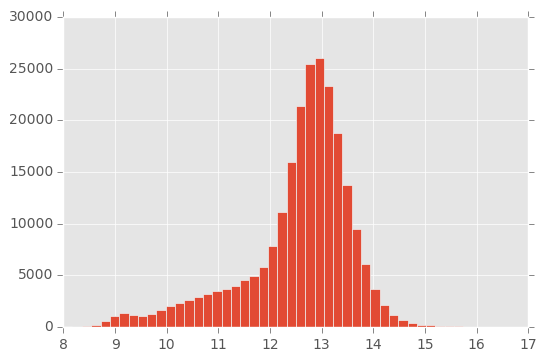

In [66]:
plt.clf()
plt.hist(np.concatenate(apo_pnas)[:,8],bins=50, range=[8,17])
plt.show()

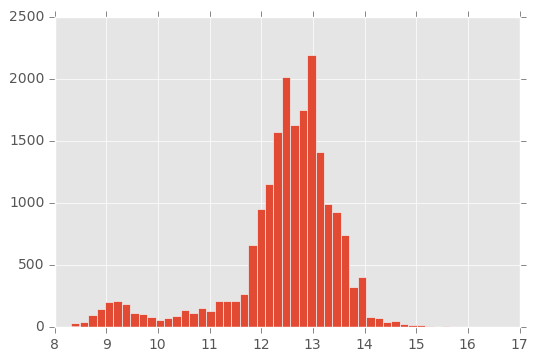

In [82]:
plt.clf()
plt.hist(apo_pnas_resampled[:,8],bins=50)
plt.show()

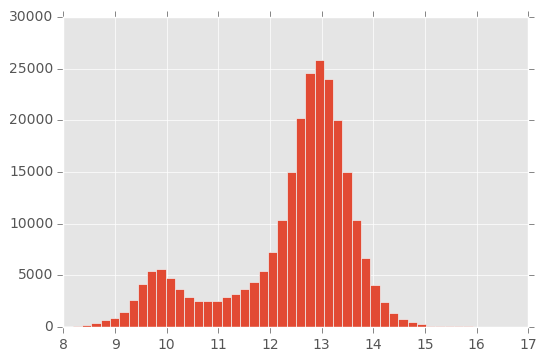

In [85]:
plt.clf()
plt.hist(np.concatenate(bu72_pnas)[:,8],bins=50, range=[8,17])
plt.show()

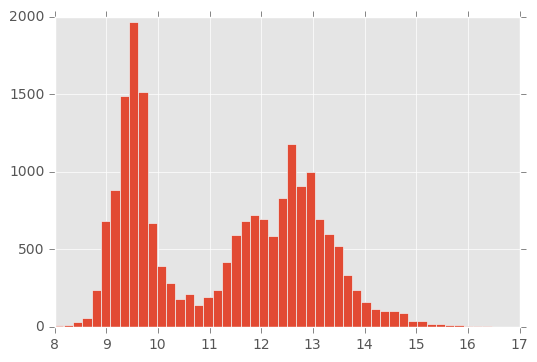

In [83]:
plt.clf()
plt.hist(bu72_pnas_resampled[:,8],bins=50, range=[8,17])
plt.show()

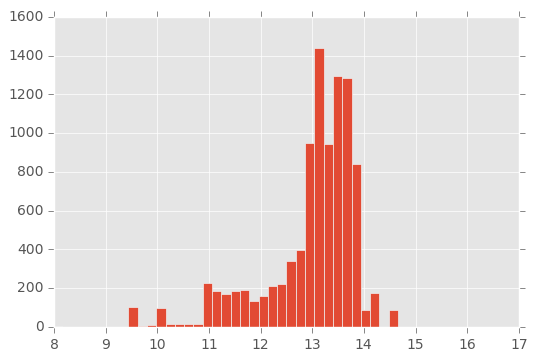

In [85]:
plt.clf()
plt.hist(suf_pnas_resampled[:,8],bins=50, range=[8,17])
plt.show()

In [79]:

bu72_lag_time=100
prior_counts = 0.0
bu72_msm_dir = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters))
if not os.path.exists(bu72_msm_dir):
    bu72_msm = build_msm(bu72_clusterer_file, bu72_lag_time, bu72_msm_dir, prior_counts)
else:
    bu72_msm = verboseload(bu72_msm_dir)

import msm_resampled
reload(msm_resampled)
from msm_resampled import *
total_samples = 20000
num_trajs = len(bu72_trajs)
prior_counts = 0.
bu72_resampled_traj_to_frames_file = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
if not os.path.exists(bu72_resampled_traj_to_frames_file):
    bu72_resampled_traj_to_frames = resample_by_msm(total_samples, bu72_msm, bu72_clusters_map, num_trajs, bu72_resampled_traj_to_frames_file)
else:
    bu72_resampled_traj_to_frames = verboseload(bu72_resampled_traj_to_frames_file)

bu72_pnas = verboseload(bu72_pnas_file)
bu72_pnas_resampled_file = os.path.join(tica_dir, "bu72_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_pnas, bu72_resampled_traj_to_frames, bu72_pnas_resampled_file)
bu72_pnas_resampled = verboseload(bu72_pnas_resampled_file)

tica_concatenated = np.concatenate(verboseload(projected_features_dir))
tica_axes = [(np.min(tica_concatenated[:,i]), np.max(tica_concatenated[:,i])) for i in range(0, np.shape(tica_concatenated)[1])]

bu72_tica = verboseload(bu72_tica_file)
bu72_tica_resampled_file = os.path.join(tica_dir, "bu72_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_tica, bu72_resampled_traj_to_frames, bu72_tica_resampled_file)
bu72_tica_resampled = verboseload(bu72_tica_resampled_file)

bu72_clusterer = verboseload(bu72_clusterer_file)
bu72_msm = verboseload(bu72_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = bu72_msm.populations_

for cluster_id in bu72_msm.mapping_.keys():
    state_id = bu72_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)
    
#plot_all_tics_and_clusters(tica_dir, bu72_tica_resampled_file, bu72_clusterer_file, lag_time, tic_range=range(0,n_components), main = "bu72_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

#plot_columns(tica_dir, bu72_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_bu72_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=False)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer3000.h5"...
fitting msm to trajectories with 3000 clusters and lag_time 100
MSM contains 123 strongly connected components above weight=0.01. Component 72 selected, with population 95.866448%
MarkovStateModel(ergodic_cutoff='on', lag_time=100, n_timescales=None,
         prior_counts=0.0, reversible_type='mle', sliding_window=True,
         verbose=True)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_msm_lag-time100_prior-counts0.0_clusters3000.h5"... (<class 'msmbuilder.msm.msm.MarkovStateModel'>)
fitted msm to trajectories with 1773 states
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Re

In [ ]:
plt.clf()
plt.hist(np.concatenate(bu72_pnas)[:,8], bins=50)
plt.show()

In [ ]:
bu72_pnas_averages = calculate_cluster_averages_per_feature(bu72_clusterer, bu72_pnas)
len(sorted(list(set(np.concatenate(bu72_clusterer.labels_)))))
print(np.sum(bu72_msm.populations_[np.concatenate(bu72_msm.transform(np.where(bu72_pnas_averages[:,8] > 12.)[0]))]))
print(np.sum(bu72_msm.populations_[np.concatenate(bu72_msm.transform(np.where(bu72_pnas_averages[:,8] < 12.)[0]))]))

In [ ]:
apo_pnas_averages = calculate_cluster_averages_per_feature(apo_clusterer, apo_pnas)
len(sorted(list(set(np.concatenate(apo_clusterer.labels_)))))
print(np.sum(apo_msm.populations_[np.concatenate(apo_msm.transform(np.where(apo_pnas_averages[:,8] > 12.)[0]))]))
print(np.sum(apo_msm.populations_[np.concatenate(apo_msm.transform(np.where(apo_pnas_averages[:,8] < 12.)[0]))]))

In [ ]:
apo_pnas_averages = calculate_cluster_averages_per_feature(apo_clusterer, apo_pnas)
sorted(list(set(np.concatenate(apo_clusterer.labels_))))

In [ ]:
np.sum(apo_msm.populations_[np.concatenate(apo_msm.partial_transform(list(set(np.concatenate(apo_clusterer.labels_)))))])

In [ ]:
apo_msm.partial_transform(list(set(np.concatenate(apo_clusterer.labels_))))

In [ ]:
apo_msm.partial_transform(np.array(list(set(np.concatenate(apo_clusterer.labels_)))))

In [ ]:
plt.clf()
plt.hist(np.concatenate(apo_pnas)[:,8], bins=50, range=[6,18.])
plt.show()

In [ ]:
graph_file = "%s/bu72_msm_lag_time%d_graph.graphml" % (tica_dir, bu72_lag_time)
bu72_tica_averages = calculate_cluster_averages_per_feature(bu72_clusterer, bu72_tica)
bu72_cluster_attributes = {}
for i, title in enumerate(["tIC.%d" %i for i in range(1,n_components+1)]):
    bu72_cluster_attributes[title] = bu72_tica_averages[:,i]
construct_graph(bu72_msm_dir, bu72_clusterer_file, n_clusters, 5, 5, graph_file, inactive = None, active = None, pnas_clusters_averages = None, tica_clusters_averages = None, docking=None, macrostate = None, cluster_attributes=bu72_cluster_attributes)

In [86]:
suf_lag_time=100
prior_counts = 0.0
suf_msm_dir = os.path.join(tica_dir, "suf_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(suf_lag_time, str(prior_counts), n_clusters))
if not os.path.exists(suf_msm_dir):
    suf_msm = build_msm(suf_clusterer_file, suf_lag_time, suf_msm_dir, prior_counts)
else:
    suf_msm = verboseload(suf_msm_dir)

import msm_resampled
reload(msm_resampled)
from msm_resampled import *
total_samples = 20000
num_trajs = len(suf_trajs)
prior_counts = 0.
suf_resampled_traj_to_frames_file = os.path.join(tica_dir, "suf_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(suf_lag_time, str(prior_counts), n_clusters, total_samples))
#if not os.path.exists(suf_resampled_traj_to_frames_file):
suf_resampled_traj_to_frames = resample_by_msm(total_samples, suf_msm, suf_clusters_map, num_trajs, suf_resampled_traj_to_frames_file)
#else:
suf_resampled_traj_to_frames = verboseload(suf_resampled_traj_to_frames_file)

suf_pnas = verboseload(suf_pnas_file)
suf_pnas_resampled_file = os.path.join(tica_dir, "suf_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(suf_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(suf_pnas, suf_resampled_traj_to_frames, suf_pnas_resampled_file)
suf_pnas_resampled = verboseload(suf_pnas_resampled_file)

tica_concatenated = np.concatenate(verboseload(projected_features_dir))
tica_axes = [(np.min(tica_concatenated[:,i]), np.max(tica_concatenated[:,i])) for i in range(0, np.shape(tica_concatenated)[1])]

suf_tica = verboseload(suf_tica_file)
suf_tica_resampled_file = os.path.join(tica_dir, "suf_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(suf_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(suf_tica, suf_resampled_traj_to_frames, suf_tica_resampled_file)
suf_tica_resampled = verboseload(suf_tica_resampled_file)

suf_clusterer = verboseload(suf_clusterer_file)
suf_msm = verboseload(suf_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = suf_msm.populations_

for cluster_id in suf_msm.mapping_.keys():
    state_id = suf_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)
    
#plot_all_tics_and_clusters(tica_dir, suf_tica_resampled_file, suf_clusterer_file, lag_time, tic_range=range(0,n_components), main = "suf_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

#plot_columns(tica_dir, suf_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_suf_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=False)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_msm_lag-time100_prior-counts0.0_clusters3000.h5"...
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_msm_lag-time100_prior-counts0.0_clusters3000_resampled_20000.h5"... (<type 'dict'>)
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_msm_lag-time100_prior-counts0.0_clusters3000_resampled_20000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/suf.h5"...


In [ ]:
plot_columns(tica_dir, apo_pnas_resampled_file, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_Apo_MSM_", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False, reshape=True)

In [ ]:
bu72_lag_time=25
prior_counts = 0.0
bu72_msm_dir = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters))
if not os.path.exists(bu72_msm_dir):
    bu72_msm = build_msm(bu72_clusterer_file, bu72_lag_time, bu72_msm_dir, prior_counts)
else:
    bu72_msm = verboseload(bu72_msm_dir)
bu72_msm.timescales_

In [ ]:
fixed_assignments = dict()
for i, traj in enumerate(bu72_clusterer.labels_):
    fixed_assignments[i] = bu72_msm.transform(traj)

In [ ]:
fixed_assignments[0]

In [ ]:
print("hello")

In [ ]:
def pop_vs_counts(msm_obj, fixed_assignments, ax,**kwargs):

    pop_count_vect=[]
    for i in range(msm_obj.n_states_):
        pop_count_vect.append(np.sum([np.count_nonzero(fixed_assignments[j]==i)
                                      for j in fixed_assignments.keys()]))
    pop_count_vect = pop_count_vect/np.sum(pop_count_vect)
    ax.errorbar(np.log10(msm_object.populations_),np.log10(pop_count_vect),**kwargs)
    ax.plot([0,-6],[0,-6])
    ax.set_ylim([-6,0])
    ax.set_xlim([-6,0])
    ax.set_xlabel(" MSM Population",size=16)
    ax.set_ylabel("Counts Population",size=16)
    return pop_count_vect
f=figure()
ax=f.add_subplot(1,1,1)
pop_count_vect = pop_vs_counts(bu72_msm, fixed_assignments, ax fmt='o', color='r',label="RCSB-ASP")
ax.legend(loc='best',prop={'size':12})

In [ ]:
total_samples = 10000
num_trajs = len(bu72_trajs)
bu72_resampled_traj_to_frames_file = os.path.join(tica_dir, "bu72_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
if not os.path.exists(bu72_resampled_traj_to_frames_file):
    bu72_resampled_traj_to_frames = resample_by_msm(total_samples, bu72_msm, bu72_clusters_map, num_trajs, bu72_resampled_traj_to_frames_file)
else:
    bu72_resampled_traj_to_frames = verboseload(bu72_resampled_traj_to_frames_file)

In [ ]:
bu72_resampled_traj_to_frames_file

In [ ]:
bu72_pnas = verboseload(bu72_pnas_file)
bu72_pnas_resampled_file = os.path.join(tica_dir, "bu72_pnas_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_pnas, bu72_resampled_traj_to_frames, bu72_pnas_resampled_file)
bu72_pnas_resampled = verboseload(bu72_pnas_resampled_file)

In [ ]:
bu72_tica = verboseload(bu72_tica_file)
bu72_tica_resampled_file = os.path.join(tica_dir, "bu72_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled_%d.h5" %(bu72_lag_time, str(prior_counts), n_clusters, total_samples))
resample_features_by_msm_equilibirum_pop(bu72_tica, bu72_resampled_traj_to_frames, bu72_tica_resampled_file)
bu72_tica_resampled = verboseload(bu72_tica_resampled_file)

In [ ]:
bu72_clusterer = verboseload(bu72_clusterer_file)
bu72_msm = verboseload(bu72_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = bu72_msm.populations_

for cluster_id in bu72_msm.mapping_.keys():
    state_id = bu72_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)
    
plot_all_tics_and_clusters(tica_dir, bu72_tica_resampled_file, bu72_clusterer_file, lag_time, tic_range=range(0,10), main = "bu72_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)

In [ ]:
bu72_pnas_file

In [ ]:
analysis_dir

In [ ]:
tica_resampled = np.vstack([verboseload(bu72_pnas_resampled_file)[::1,], verboseload(apo_pnas_resampled_file)[::1,]])
mins = np.min(tica_resampled, axis=0)
maxs = np.max(tica_resampled, axis=0)
stds = np.std(tica_resampled, axis=0)
custom_lims = [[mins[i] - 1.*stds[i], maxs[i] + 1.*stds[i]] for i in range(0,len(mins))]

In [ ]:
ref_pnas = load_file("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5")
ref_pnas = np.hstack([np.array(x).T for x in ref_pnas])

In [ ]:
def get_features(features_dir):
    feature_files = get_trajectory_files(features_dir, ".dataset")
    features = np.vstack([load_file(f) for f in feature_files])
    print(features.shape)
    return features

ref_pp_features = pd.DataFrame(get_features(ref_features_dir), columns=feature_names)

ref_pp_tica = pd.read_csv(ref_tica_coords, header=None).values
#ref_pp_tica.columns = ["mOR tIC.%d" %i for i in range(1,ref_pp_tica.shape[1])]

ref_pnas = load_file("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5")
ref_pnas = np.hstack([np.array(x).T for x in ref_pnas])

#ref_pnas = pd.DataFrame(ref_pnas, columns=sorted(feature_name_residues_dict.keys()))

#ref_features = pd.concat([ref_pp_features*10., ref_lp_features*10., ref_pp_tica, ref_lp_tica, ref_pnas], axis=1)

In [ ]:
ref_pp_tica

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
jointplots(bu72_pnas_resampled[::1,:], analysis_dir, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_BU72_MSM_", refcoords = ref_pnas, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=3., custom_lims=custom_lims, n_levels=15, n_pts=200j, parallel=True)

In [ ]:
ref_pnas

In [ ]:
jointplots(apo_pnas_resampled[::1,:], analysis_dir, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_APO_MSM_", refcoords=ref_pnas, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=3., custom_lims=custom_lims, n_levels=10)

In [ ]:
jointplots(suf_pnas_resampled[::1,:], analysis_dir, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_SUF_MSM_", refcoords=ref_pnas, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=20, min_density=None, max_diff=3., custom_lims=custom_lims, n_levels=10)

In [ ]:
tica_resampled = np.vstack([verboseload(bu72_tica_resampled_file)[::1,], verboseload(apo_tica_resampled_file)[::1,]])
mins = np.min(tica_resampled, axis=0)
maxs = np.max(tica_resampled, axis=0)
stds = np.std(tica_resampled, axis=0)
custom_lims = [[mins[i] - 1.*stds[i], maxs[i] + 1.*stds[i]] for i in range(0,len(mins))]


In [ ]:
print(custom_lims)
print(custom_lims[3][1])

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
refcoords_jointplots_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(refcoords_jointplots_dir):
    os.makedirs(refcoords_jointplots_dir)
#jointplots(verboseload(bu72_tica_resampled_file)[::1,:], refcoords_jointplots_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "BU72 MSM", refcoords=ref_pp_tica, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=10, min_density=None, max_diff=5., custom_lims=custom_lims, n_pts=200j, n_levels=15)
jointplots(verboseload(apo_tica_resampled_file)[::1,:], refcoords_jointplots_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Apo MSM", refcoords=ref_pp_tica, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=10, min_density=None, max_diff=5., custom_lims=custom_lims, n_pts=200j, n_levels=15)


#jointplots(verboseload(suf_tica_resampled_file)[::1,:], refcoords_jointplots_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Sufentanil MSM", refcoords=ref_pp_tica, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=10, min_density=None, max_diff=5., custom_lims=custom_lims, n_pts=200j, n_levels=15)

In [ ]:
np.concatenate(bu72_tica).shape

In [ ]:
np.concatenate(apo_tica).shape

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *
jointplots(verboseload(bu72_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "BU72 MSM", refcoords=None, axes=None, data_j=bu72_pnas_resampled, titles_j=sorted(feature_name_residues_dict.keys()), reshape=False, max_tIC=10, min_density=None, max_diff=5., custom_lims=None)
jointplots(verboseload(apo_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Apo MSM", refcoords=None, axes=None, data_j=apo_pnas_resampled, titles_j=sorted(feature_name_residues_dict.keys()), reshape=False, max_tIC=10, min_density=None, max_diff=5., custom_lims=None)


#jointplots(verboseload(suf_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Sufentanil MSM", refcoords=None, axes=None, data_j=bu72_pnas_resampled, titles_j=sorted(feature_name_residues_dict.keys()), reshape=False, max_tIC=10, min_density=None, max_diff=5., custom_lims=None)

In [ ]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *


In [ ]:
#sample_tIC_regions_silverman(np.concatenate(verboseload(projected_features_dir))[::100,:], analysis_dir)
#get_kde_mins_and_maxes(np.concatenate(verboseload(projected_features_dir))[::100,:], analysis_dir)
sample_kde_maxima(verboseload(projected_features_dir), analysis_dir, trajs)

In [ ]:
jointplots(verboseload(apo_tica_resampled_file)[::1,:], analysis_dir, titles = ["tIC%d" %j for j in range(1,n_components+1)], main = "Apo MSM", refcoords_file = None, axes=None, data_j=None, titles_j=None, reshape=False, max_tIC=5, min_density=None, max_diff=5., custom_lims=custom_lims)

In [ ]:
plot_columns(tica_dir, bu72_pnas_resampled_file, titles = sorted(feature_name_residues_dict.keys()), main = "mOR_BU72_MSM_", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False, reshape=True)

In [ ]:
#bu72_tica = verboseload(bu72_tica_file)
#bu72_tica_resampled_file = os.path.join(tica_dir, "bu72_tica_msm_lag-time%d_prior-counts%s_clusters%d_resampled.h5" %(lag_time, str(prior_counts), n_clusters))
#resample_features_by_msm_equilibirum_pop(bu72_tica, bu72_resampled_traj_to_frames, bu72_tica_resampled_file)
#bu72_tica_resampled = verboseload(bu72_tica_resampled_file)
plot_columns(tica_dir, bu72_tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_BU72_MSM_", tICA = False, scale = 1.0, refcoords_file = ref_tica_coords, axes=tica_axes, concatenate=False, reshape=True)

In [ ]:
bu72_clusterer = verboseload(bu72_clusterer_file)
bu72_msm = verboseload(bu72_msm_dir)

cluster_id_proportion_tuples = []

equilibrium_populations = bu72_msm.populations_

for cluster_id in bu72_msm.mapping_.keys():
    state_id = bu72_msm.mapping_[cluster_id]
    cluster_id_proportion_tuples.append((cluster_id,equilibrium_populations[state_id]))
cluster_id_proportion_tuples = sorted(cluster_id_proportion_tuples, key=itemgetter(1), reverse=True)

#plot_all_tics_and_clusters(tica_dir, bu72_tica_resampled_file, bu72_clusterer_file, lag_time, tic_range=[0,3], main = "BU72_MSM_Reweighted", label = "cluster_id", active_cluster_ids = [c[0] for c in cluster_id_proportion_tuples[0:100]], intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=False, axes=tica_axes)


In [ ]:
len(dview)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters=
samples_dir = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(bu72_clusterer_file, bu72_tica_file, [traj_files[i] for i in bu72_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG")

In [87]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 3000
samples_dir = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(suf_clusterer_file, suf_tica_file, [traj_files[i] for i in suf_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG")

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_clusterer_3000clusters_1samples_samples_kdtree
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_clusterer3000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_tica.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/suf_clusterer3000.h5"...
[[234 356]
 [141 151]
 [136 244]
 ..., 
 [234 215]
 [598  60]
 [647 488]]
3000
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoS

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 5
n_clusters=1000
samples_dir = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)

sample_from_clusterer(apo_clusterer_file, apo_tica_file, [traj_files[i] for i in apo_trajs],
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG")

In [ ]:
traj_files

In [ ]:
feature_name_residues_dict.keys()

In [ ]:

np.shape(apo_pnas_resampled)
msm_dir = os.path.join(tica_dir, "msm_lag-time%d_prior-counts%s_clusters%d_analysis" %(lag_time, str(prior_counts), n_clusters))
if not os.path.exists(msm_dir): os.makedirs(msm_dir)

#plot_columns(msm_dir, apo_pnas_resampled_file, titles = feature_name_residues_dict.keys(), main = "Apo-mOR", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False)

In [ ]:
import pip

def install(package):
    pip.main(['install', package])
    
install("moviepy")

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

for i, traj in enumerate(get_trajectory_files(traj_dir, traj_ext)):
    if "apo_rep_68." in traj:
        index=i
        break

jointplot(apo_pnas_resampled[::10,[6,3]], "%s/test.pdf" %msm_dir, trajectory=apo_pnas[index][::1,[6,3]], 
          titles=["TM6 to TM3 distance", "RMSD of NPxxY to Inactive"], main = "mOR Activation Pathway", 
          video_file = "%s/apo_68.mp4" %msm_dir, custom_xlim=[4.0, 16.0], custom_ylim= [0.0, 1.0])
#test("%s/test2.mp4" %msm_dir)

In [ ]:
build_msm(bu72_clusterer_file, lag_time, msm_model_dir)
build_msm(apo_clusterer_file, lag_time, msm_model_dir)

In [ ]:
tics_1_5_file = os.path.join(tica_dir, "tICs_1_5.h5")
tics = load_file(projected_features_dir)
tics_1_5 = [x[:,range(1,5)] for x in tics]
verbosedump(tics_1_5, tics_1_5_file)

clusterer300_clusters = os.path.join(tica_dir, "clusterer300_clusters_tICs1_5.h5")
cluster_minikmeans(tica_dir, tics_1_5_file, traj_dir, n_clusters=300, clusterer_dir=clusterer300_clusters)

In [ ]:
len(dview)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 300

traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
suf_traj_files = [t for t in featurized_trajectories if "suf" in t]
reduced_clusterer = verboseload(clusterer300_clusters)
suf_reduced_clusterer_file = "%s/suf_reduced_clusterer.h5" %tica_dir

suf_reduced_tica_file = "%s/suf_reduced_tica.h5" %tica_dir
suf_reduced_tica = [x[:,range(1,5)] for x in suf_tica]
suf_reseeded_dir = "%s/suf_reseeded_samples" %tica_dir
if not os.path.exists(suf_reseeded_dir):
    os.makedirs(suf_reseeded_dir)
verbosedump(suf_reduced_tica, suf_reduced_tica_file)

suf_reduced_clusters = [reduced_clusterer.labels_[i] for i in suf_trajs]
suf_reduced_clusterer = copy.deepcopy(reduced_clusterer)
suf_reduced_clusterer.labels_ = suf_reduced_clusters
verbosedump(suf_reduced_clusterer, suf_reduced_clusterer_file)
#reseed_from_clusterer(suf_reduced_clusterer_file, "suf", suf_reseeded_dir, suf_reduced_tica_file, suf_traj_files)


samples_dir = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
reseed_dir = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree_reseed" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/suf_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
if not os.path.exists(reseed_dir): os.makedirs(reseed_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(suf_reduced_clusterer_file, suf_reduced_tica_file, [traj_files[i] for i in suf_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG", reseed_dir = reseed_dir)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 300

traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
bu72_traj_files = [t for t in featurized_trajectories if "bu72" in t]
reduced_clusterer = verboseload(clusterer300_clusters)
bu72_reduced_clusterer_file = "%s/bu72_reduced_clusterer.h5" %tica_dir

bu72_reduced_tica_file = "%s/bu72_reduced_tica.h5" %tica_dir
bu72_reduced_tica = [x[:,range(1,5)] for x in bu72_tica]
bu72_reseeded_dir = "%s/bu72_reseeded_samples" %tica_dir
if not os.path.exists(bu72_reseeded_dir):
    os.makedirs(bu72_reseeded_dir)
verbosedump(bu72_reduced_tica, bu72_reduced_tica_file)

bu72_reduced_clusters = [reduced_clusterer.labels_[i] for i in bu72_trajs]
bu72_reduced_clusterer = copy.deepcopy(reduced_clusterer)
bu72_reduced_clusterer.labels_ = bu72_reduced_clusters
verbosedump(bu72_reduced_clusterer, bu72_reduced_clusterer_file)
#reseed_from_clusterer(bu72_reduced_clusterer_file, "bu72", bu72_reseeded_dir, bu72_reduced_tica_file, bu72_traj_files)


samples_dir = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
reseed_dir = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree_reseed" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/bu72_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
if not os.path.exists(reseed_dir): os.makedirs(reseed_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(bu72_reduced_clusterer_file, bu72_reduced_tica_file, [traj_files[i] for i in bu72_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG", reseed_dir = reseed_dir)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

n_samples = 1
n_clusters = 300

traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
apo_traj_files = [t for t in featurized_trajectories if "apo" in t]
reduced_clusterer = verboseload(clusterer300_clusters)
apo_reduced_clusterer_file = "%s/apo_reduced_clusterer.h5" %tica_dir

apo_reduced_tica_file = "%s/apo_reduced_tica.h5" %tica_dir
apo_reduced_tica = [x[:,range(1,5)] for x in apo_tica]
apo_reseeded_dir = "%s/apo_reseeded_samples" %tica_dir
if not os.path.exists(apo_reseeded_dir):
    os.makedirs(apo_reseeded_dir)
verbosedump(apo_reduced_tica, apo_reduced_tica_file)

apo_reduced_clusters = [reduced_clusterer.labels_[i] for i in apo_trajs]
apo_reduced_clusterer = copy.deepcopy(reduced_clusterer)
apo_reduced_clusterer.labels_ = apo_reduced_clusters
verbosedump(apo_reduced_clusterer, apo_reduced_clusterer_file)
#reseed_from_clusterer(apo_reduced_clusterer_file, "apo", apo_reseeded_dir, apo_reduced_tica_file, apo_traj_files)


samples_dir = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
reseed_dir = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree_reseed" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/apo_clusterer_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
if not os.path.exists(reseed_dir): os.makedirs(reseed_dir)
print(samples_dir)
traj_files = get_trajectory_files(traj_dir, traj_ext)    
sample_from_clusterer(apo_reduced_clusterer_file, apo_reduced_tica_file, [traj_files[i] for i in apo_trajs], 
                      n_samples, samples_dir, samples_indices_file,
                      worker_pool=dview, parallel=False, lig_name="LIG", reseed_dir = reseed_dir)

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *
traj_files = get_trajectory_files(traj_dir, traj_ext)
featurized_trajectories = [traj_files[i] for i in feature_indices]
oxy_traj_files = [t for t in featurized_trajectories if "oxy" in t]
reduced_clusterer = verboseload(clusterer300_clusters)
oxy_reduced_clusterer_file = "%s/oxy_reduced_clusterer.h5" %tica_dir

oxy_reduced_tica_file = "%s/oxy_reduced_tica.h5" %tica_dir
oxy_reduced_tica = [x[:,range(1,10)] for x in oxy_tica]
verbosedump(oxy_reduced_tica, oxy_reduced_tica_file)

oxy_reduced_clusters = [reduced_clusterer.labels_[i] for i in oxy_trajs]
oxy_reduced_clusterer = copy.deepcopy(reduced_clusterer)
oxy_reduced_clusterer.labels_ = oxy_reduced_clusters
verbosedump(oxy_reduced_clusterer, oxy_reduced_clusterer_file)
reseed_from_clusterer(oxy_reduced_clusterer_file, "oxy", tica_dir, oxy_reduced_tica_file, oxy_traj_files)

In [ ]:
closest_indices = find_closest_indices_to_cluster_center(tics_1_3_file, clusterer16_clusters)

In [ ]:
closest_indices

In [ ]:
from scipy.stats import gamma 
x = np.linspace(0.,16.0, 100)
y = gamma.pdf(x, 5.0, loc=8.0, scale=1)
plt.plot(x,y)

In [ ]:
from scipy.stats import gamma 
x = np.linspace(0.,16.0, 100)
y = gamma.pdf(x, 3.0, loc=8.0, scale=0.4)
plt.plot(x,y)
plt.show()

In [ ]:
reseed_from_clusterer(oxy_clusterer_file, "oxy", tica_dir, oxy_tica_file, [trajs[i] for i in oxy_trajs])

In [ ]:
min_pop = [3, 4, 6, 8, 9, 26, 29, 30, 31, 32, 33, 39, 41, 43, 52, 55]


In [ ]:
plot_all_tics_and_clusters(tica_dir, oxy_tica_file, oxy_clusterer_file, lag_time, tic_range=range(0,5), main = "Oxy_Reseeds", label = "cluster_id", active_cluster_ids = min_pop, intermediate_cluster_ids = [], inactive_cluster_ids = [], concatenate=True, axes=tica_axes)